In [47]:
import numpy as np
import os
import cv2
import time
import glob
import matplotlib.pyplot as plt

# 读取连续图像并输出为视频

In [90]:
def picvideo(path,size):
    paths=glob.glob(os.path.join(path,'*.jpg'))
    paths.sort()
    fps= 6                                              #帧数                                       
    fourcc=cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
    file_path = 'desktop/Carsequence.mp4'                #输出路径
    video = cv2.VideoWriter(file_path, fourcc, fps, size)
    for item in paths:
        img = cv2.imread(item)  
        video.write(img) 
    video.release()
picvideo('desktop/CarSequence',(720,480))

# 将模版与图片相对照，并输出为视频

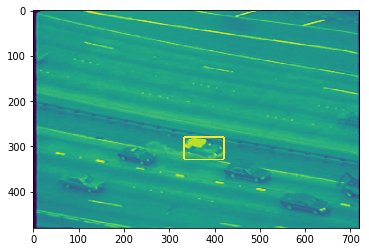

In [102]:
def drawimage(res,img):
    plt.imshow(res)
    plt.imshow(img)
path='desktop/CarSequence'
paths=glob.glob(os.path.join(path,'*.jpg'))
paths.sort()
i=0
while i<101:
    img=cv2.imread(paths[i],0)
    template=cv2.imread('desktop/car_template.jpg',0)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left=max_loc
    bottom_right=(top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    drawimage(res,img)
    #plt.savefig('desktop/new_car/'+ paths[i])
    i=i+1

In [91]:
picvideo('desktop/new_car/desktop/CarSequence',(432,288))

# Plot RGB images

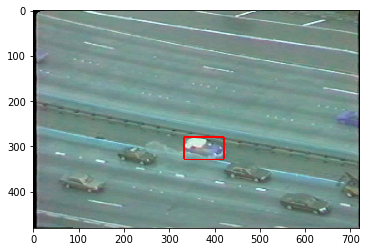

In [106]:
def drawimage(res,img):
    plt.imshow(res)
    plt.imshow(img)
path='desktop/CarSequence'
paths=glob.glob(os.path.join(path,'*.jpg'))
paths.sort()
i=0
while i<101:
    img_RGB=cv2.imread(paths[i])
    img_gray =cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)
    template=cv2.imread('desktop/car_template.jpg',0)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left=max_loc
    bottom_right=(top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_RGB,top_left, bottom_right, 255, 2)
    drawimage(res,img_RGB)
    plt.savefig('desktop/new_car/'+ paths[i])
    i=i+1

In [107]:
picvideo('desktop/new_car/desktop/CarSequence',(432,288))